<a href="https://colab.research.google.com/github/Anthonaut/COMP-390-Tutorial-Image-Classifcation-with-CNN/blob/main/Image_Classification_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation

In [1]:
pip install -q tensorflow tensorflow-datasets

     |████████████████████████████████| 462 kB 4.7 MB/s 


## Import Necessary Libaries

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
tfds.disable_progress_bar() # - Gets rid of the progress bars that appear (e.g running "ds_train" and "ds_test")

## Find Datasets

In [3]:
# https://www.tensorflow.org/datasets/overview
# https://www.tensorflow.org/datasets/catalog/overview
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

## Get information on the Data

In [4]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info

info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

## Prepare Rock, Paper, Scissors Data

In [5]:
ds_train = tfds.load(name="rock_paper_scissors", split="train")
ds_test = tfds.load(name="rock_paper_scissors", split="test")

Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete3NRG95/rock_paper_scissors-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incomplete3NRG95/rock_paper_scissors-test.tfrecord
Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


## Show Examples

The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


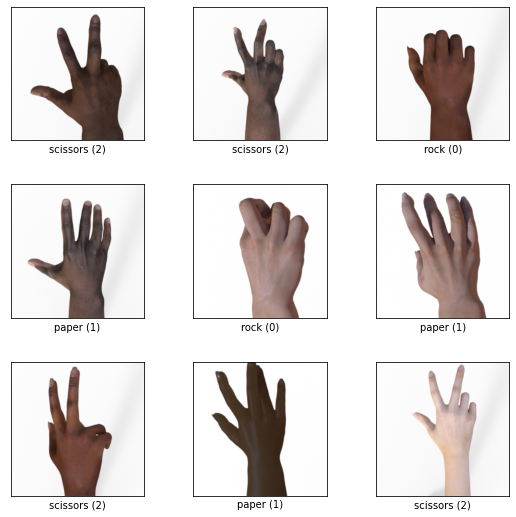

In [6]:
fig = tfds.show_examples(info, ds_train)

## Additional Data Prep

In [7]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [8]:
# type(train_images[0]) - numpy type
# train_images.shape - (2520, 300, 300), 1st values is # number of images
# test_images.shape - (372, 300, 300)
train_images = train_images.reshape(2520, 300, 300, 1) # Makes images grayscale
test_images = test_images.reshape(372, 300, 300, 1)

# train_images.dtype
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

## Train a Network (Basic Approach)

In [9]:
model = keras.Sequential([
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 5s 28ms/step - loss: 21.5663 - accuracy: 0.4341
Epoch 2/5
79/79 [==============================] - 2s 27ms/step - loss: 1.8424 - accuracy: 0.7302
Epoch 3/5
79/79 [==============================] - 2s 27ms/step - loss: 0.6785 - accuracy: 0.7861
Epoch 4/5
79/79 [==============================] - 2s 26ms/step - loss: 0.4683 - accuracy: 0.8401
Epoch 5/5
79/79 [==============================] - 2s 27ms/step - loss: 0.6560 - accuracy: 0.8024


In [10]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 11ms/step - loss: 2.0760 - accuracy: 0.4892


[2.0759685039520264, 0.48924732208251953]

## Train a Network (Convolutional Approach)

In [11]:
model = keras.Sequential([
  keras.layers.Conv2D(64, 3, activation='relu', input_shape=(300,300,1)),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.Flatten(),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 38s 365ms/step - loss: 5.2165 - accuracy: 0.6190
Epoch 2/5
79/79 [==============================] - 26s 335ms/step - loss: 0.4808 - accuracy: 0.8746
Epoch 3/5
79/79 [==============================] - 27s 336ms/step - loss: 0.1986 - accuracy: 0.9786
Epoch 4/5
79/79 [==============================] - 27s 338ms/step - loss: 0.0238 - accuracy: 0.9964
Epoch 5/5
79/79 [==============================] - 27s 337ms/step - loss: 0.0082 - accuracy: 0.9996


In [12]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 3s 245ms/step - loss: 1.3734 - accuracy: 0.6102


[1.373398780822754, 0.6102150678634644]

## A Better Convolutional Network - solve the problem of overfitting

In [28]:
model = keras.Sequential([
  keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)),
  keras.layers.Conv2D(64, 3, activation='relu'),
  keras.layers.Conv2D(32, 3, activation='relu'),
  keras.layers.MaxPool2D(2,2),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 5s 52ms/step - loss: 0.7567 - accuracy: 0.7536
Epoch 2/5
79/79 [==============================] - 4s 50ms/step - loss: 0.0578 - accuracy: 0.9893
Epoch 3/5
79/79 [==============================] - 4s 50ms/step - loss: 0.0141 - accuracy: 0.9988
Epoch 4/5
79/79 [==============================] - 4s 50ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 5/5
79/79 [==============================] - 4s 50ms/step - loss: 0.0061 - accuracy: 0.9992


In [21]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 26ms/step - loss: 0.9872 - accuracy: 0.6935


[0.987220287322998, 0.6935483813285828]

## Hyperparameter Tuning

In [ ]:
pip install keras-tuner --upgrade

In [30]:
from kerastuner.tuners import RandomSearch

def build_model(hp):
  model = keras.Sequential()

  model.add(keras.layers.AveragePooling2D(6,3, input_shape=(300,300,1)))
  
  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(32, 3, activation='relu'))
  # for i in range(hp.Int("Conv layers", min_value=0, max_value=3)): # Test between 0-3 conv layers, for each layer the number of filters used (i.e [16,32,64])
  #  model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16,32,64], 3, activation='relu')))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice("Denser layer", [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)


Trial 5 Complete [00h 01m 23s]
val_accuracy: 0.7526881694793701

Best val_accuracy So Far: 0.7634408473968506
Total elapsed time: 00h 07m 55s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [31]:
best_model = tuner.get_best_models()[0] # Get the best model that has been tested

In [32]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 1s 31ms/step - loss: 0.6659 - accuracy: 0.7634


[0.6659175753593445, 0.7634408473968506]

In [33]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 99, 99, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 97, 97, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 flatten (Flatten)           (None, 70688)             0

In [34]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
Denser layer: 512
Score: 0.7634408473968506
Trial summary
Hyperparameters:
Denser layer: 128
Score: 0.7526881694793701
Trial summary
Hyperparameters:
Denser layer: 64
Score: 0.7069892287254333
Trial summary
Hyperparameters:
Denser layer: 256
Score: 0.7016128897666931
Trial summary
Hyperparameters:
Denser layer: 1024
Score: 0.6532257795333862


## Save & Load our Models

In [35]:
best_model.save('./my_model') # Save the model with its parameters

INFO:tensorflow:Assets written to: ./my_model/assets


INFO:tensorflow:Assets written to: ./my_model/assets


In [36]:
loaded_model = keras.models.load_model('./my_model') # Use the above two lines of code on your local machine, Colab isn't guaranteed to save it the next time you run it

In [37]:
loaded_model.evaluate(test_images, test_labels) # Test the saved model

12/12 [==============================] - 1s 32ms/step - loss: 0.6659 - accuracy: 0.7634


[0.6659175753593445, 0.7634408473968506]

Plot Image from Numpy Array

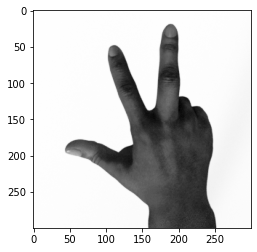

In [42]:
image = train_images[0].reshape(300, 300)

plt.imshow(image, cmap='Greys_r')

(300, 300, 3)

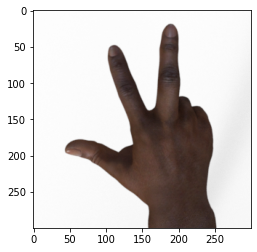

In [41]:
 rgb_images=np.array([example['image'].numpy() for example in ds_train.take(1)])
 rgb_image = rgb_images[0]

 plt.imshow(rgb_image)
 rgb_image.shape

## Convert PNG/JPG images to Numpy Format

<class 'imageio.core.util.Array'>
(658, 1200, 3)


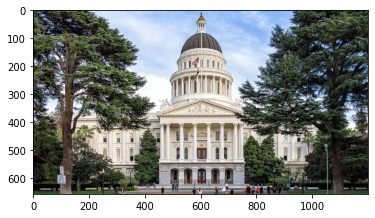

In [45]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Sacramento%2C-California---State-Capitol_%28cropped%29.jpg/1200px-Sacramento%2C-California---State-Capitol_%28cropped%29.jpg')

plt.imshow(im)

print(type(im))

im_np = np.asarray(im) # Converts to Numpy
print(im_np.shape)